In [1]:
# Re-import libraries and reload datasets after reset
import pandas as pd

# Load train dataset
train_data = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv')
test_data = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv')
data_dictionary = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/data_dictionary.csv')
sample_submission = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv')

# Display general information and a preview of the dataset
train_info = train_data.info()
train_head = train_data.head()

(train_info, train_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

(None,
    ID                       dri_score psych_disturb    cyto_score diabetes  \
 0   0  N/A - non-malignant indication            No           NaN       No   
 1   1                    Intermediate            No  Intermediate       No   
 2   2  N/A - non-malignant indication            No           NaN       No   
 3   3                            High            No  Intermediate       No   
 4   4                            High            No           NaN       No   
 
    hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
 0               NaN             NaN              No TBI         No   
 1               2.0             8.0  TBI +- Other, >cGy         No   
 2               2.0             8.0              No TBI         No   
 3               2.0             8.0              No TBI         No   
 4               2.0             8.0              No TBI         No   
 
    hla_low_res_6  ...          tce_div_match donor_related  \
 0            6.0  ...    

In [2]:
# Kiểm tra các thông tin chung và thống kê cơ bản trong tập train
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(train_data)) * 100

# Thống kê cơ bản
summary_stats = train_data.describe(include='all').transpose()

# Tổng hợp thông tin thiếu
missing_info = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Percent": missing_percent
}).sort_values(by="Missing Percent", ascending=False)

print("Thống kê thiếu dữ liệu trong tập Train:")
display(missing_info)

summary_stats


Thống kê thiếu dữ liệu trong tập Train:


,Missing Values,Missing Percent
tce_match,18996,65.958333
mrd_hct,16597,57.628472
cyto_score_detail,11923,41.399306
tce_div_match,11396,39.569444
tce_imm_match,11133,38.656250
cyto_score,8068,28.013889
hla_high_res_10,7163,24.871528
hla_high_res_8,5829,20.239583
hla_high_res_6,5284,18.347222
hla_match_dqb1_high,5199,18.052083


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,28800.0,NaN,NaN,NaN,14399.5,8313.988213,0.0,7199.75,14399.5,21599.25,28799.0
dri_score,28646,11,Intermediate,10436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
psych_disturb,26738,3,No,23005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyto_score,20732,7,Poor,8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetes,26681,3,No,22201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hla_match_c_high,24180.0,NaN,NaN,NaN,1.764516,0.431941,0.0,2.0,2.0,2.0,2.0
hla_high_res_8,22971.0,NaN,NaN,NaN,6.876801,1.564313,2.0,6.0,8.0,8.0,8.0
tbi_status,28800,8,No TBI,18861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrhythmia,26598,3,No,25203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hla_low_res_6,25530.0,NaN,NaN,NaN,5.143322,1.207757,2.0,4.0,6.0,6.0,6.0


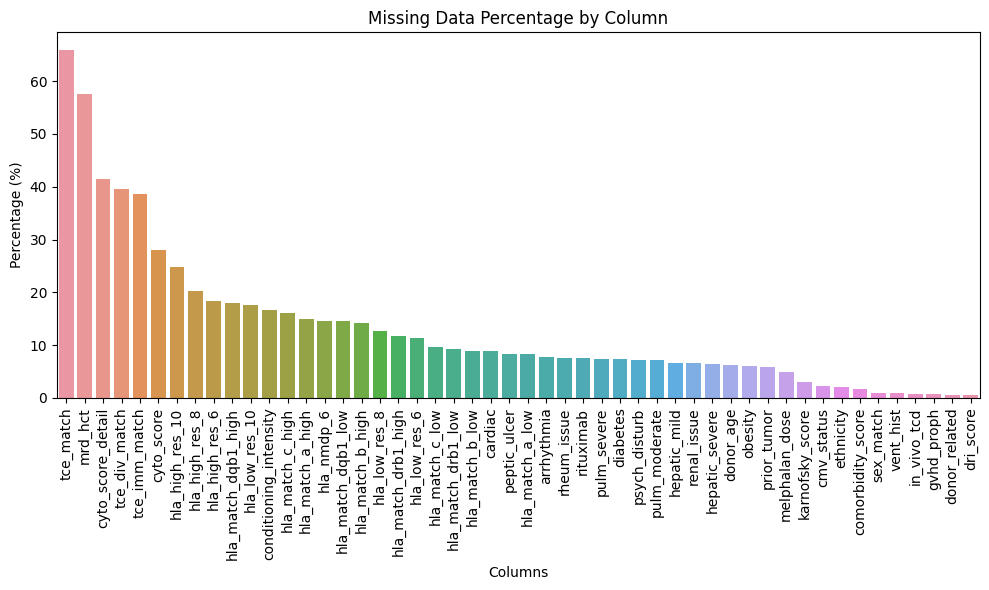

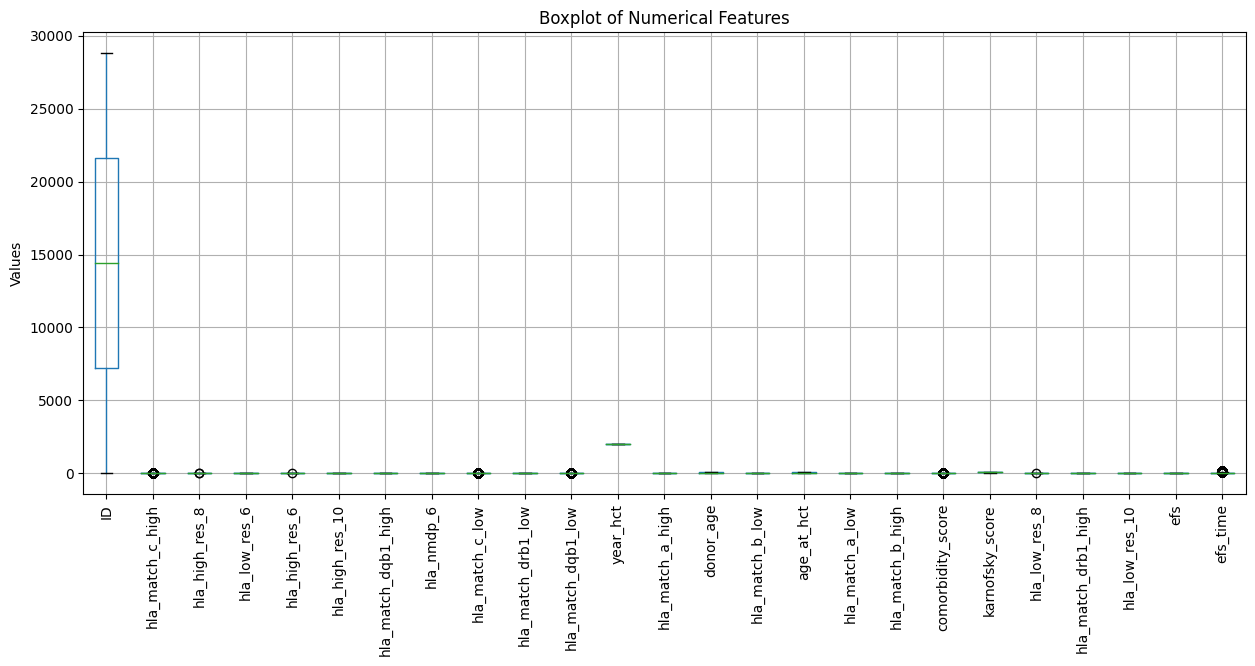

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,28800.0,NaN,NaN,NaN,14399.5,8313.988213,0.0,7199.75,14399.5,21599.25,28799.0
dri_score,28646,11,Intermediate,10436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
psych_disturb,26738,3,No,23005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cyto_score,20732,7,Poor,8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetes,26681,3,No,22201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hla_match_c_high,24180.0,NaN,NaN,NaN,1.764516,0.431941,0.0,2.0,2.0,2.0,2.0
hla_high_res_8,22971.0,NaN,NaN,NaN,6.876801,1.564313,2.0,6.0,8.0,8.0,8.0
tbi_status,28800,8,No TBI,18861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrhythmia,26598,3,No,25203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hla_low_res_6,25530.0,NaN,NaN,NaN,5.143322,1.207757,2.0,4.0,6.0,6.0,6.0


,Missing Values,Percentage (%)
tce_match,18996,65.958333
mrd_hct,16597,57.628472
cyto_score_detail,11923,41.399306
tce_div_match,11396,39.569444
tce_imm_match,11133,38.656250
cyto_score,8068,28.013889
hla_high_res_10,7163,24.871528
hla_high_res_8,5829,20.239583
hla_high_res_6,5284,18.347222
hla_match_dqb1_high,5199,18.052083


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of train data
train_stats = train_data.describe(include='all').transpose()

# Missing values analysis
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_values_percent = (missing_values / len(train_data)) * 100

missing_values_df = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_values_percent
}).query("`Missing Values` > 0")

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_df.index, y=missing_values_df["Percentage (%)"])
plt.xticks(rotation=90)
plt.title("Missing Data Percentage by Column")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

# Outliers detection in numerical columns using boxplots
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 6))
train_data[numerical_columns].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.show()

# Display statistics and missing value analysis
display(train_stats)  # Display Train Data Statistics
display(missing_values_df)


In [4]:
from sklearn.impute import SimpleImputer

# Separate features and target
X = train_data.drop(columns=["efs", "efs_time", "ID"])
y = train_data["efs"]  # Assuming "efs" is the target variable

# Handle missing values
# For numerical columns, impute with median
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
numerical_imputer = SimpleImputer(strategy='median')
X[numerical_columns] = numerical_imputer.fit_transform(X[numerical_columns])

# For categorical columns, impute with the most frequent value
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = categorical_imputer.fit_transform(X[categorical_columns])

# Check if there are still missing values
remaining_missing = X.isnull().sum().sum()

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Display processed data to the user
display(X.head())  

remaining_missing


,hla_match_c_high,hla_high_res_8,hla_low_res_6,hla_high_res_6,hla_high_res_10,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,...,tce_div_match_GvH non-permissive,tce_div_match_HvG non-permissive,tce_div_match_Permissive mismatched,donor_related_Related,donor_related_Unrelated,"melphalan_dose_N/A, Mel not given",cardiac_Not done,cardiac_Yes,pulm_moderate_Not done,pulm_moderate_Yes
0,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,False,False,True,False,True,True,False,False,False,False
1,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,False,False,True,True,False,True,False,False,False,True
2,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,False,False,True,True,False,True,False,False,False,False
3,2.0,8.0,6.0,6.0,10.0,2.0,6.0,2.0,2.0,2.0,...,False,False,True,False,True,True,False,False,False,False
4,2.0,8.0,6.0,6.0,10.0,2.0,5.0,2.0,2.0,2.0,...,False,False,True,True,False,False,False,False,False,False


0

In [5]:
!pip install lifelines

from lifelines import KaplanMeierFitter

# Instantiate the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier model
kmf.fit(durations=train_data['efs_time'], event_observed=train_data['efs'])

# Create a temporary DataFrame with unique 'efs_time' values
unique_times = train_data[['efs_time']].drop_duplicates()

# Predict risk scores for unique times
unique_times['risk_score'] = 1 - kmf.predict(unique_times['efs_time'])

# Merge the risk scores back into the original DataFrame based on 'efs_time'
train_data = pd.merge(train_data, unique_times, on='efs_time', how='left')

# Display the first few rows to verify
print(train_data[['efs_time', 'efs', 'risk_score']].head())


Looking in links: /kaggle/input/pm-73855604-at-01-02-2025-08-19-36/
   efs_time  efs  risk_score
0    42.356  0.0         NaN
1     4.672  1.0    0.000903
2    19.793  0.0         NaN
3   102.349  0.0    0.035972
4    16.223  0.0    0.094275


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare the data for modeling
# Drop rows with NaN in 'risk_score' to ensure a clean dataset
train_data_clean = train_data.dropna(subset=['risk_score'])

# Features and target
X = train_data_clean.drop(columns=['efs', 'efs_time', 'ID', 'risk_score'])
y = train_data_clean['risk_score']

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Use LabelEncoder for simplicity
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    X[col] = label_encoders[col].fit_transform(X[col].astype(str))

# Split into train and test sets again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Display MSE and sample predictions
mse, y_pred[:5]


(0.033289254769532,
 array([0.06531876, 0.5327402 , 0.54184604, 0.519997  , 0.53373915],
       dtype=float32))

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create an array to store MSE scores
mse_scores = []

# Perform cross-validation manually
for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Train the XGBRegressor model
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = xgb_model.predict(X_val)
    
    # Calculate MSE for the current fold
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)

# Calculate mean and standard deviation of MSE scores
cv_mean = np.mean(mse_scores)
cv_std = np.std(mse_scores)

# Display results
cv_mean, cv_std, mse_scores


(0.04626111707953544,
 0.016633221095906703,
 [0.033289254769532,
  0.03641187753956054,
  0.05457977519772373,
  0.07523425160105218,
  0.03179042628980875])

In [8]:
import numpy as np

def stratified_c_index(y_time, y_event, y_pred):
    """
    Calculate the Stratified C-index.
    y_time: Array of event/censoring times (efs_time).
    y_event: Array of event indicators (1 if event occurred, 0 if censored).
    y_pred: Array of predicted risk scores (higher = higher risk).
    """
    n = len(y_time)
    concordant = 0
    permissible = 0
    
    for i in range(n):
        for j in range(n):
            if y_time[j] < y_time[i] and y_event[j] == 1:
                permissible += 1
                if y_pred[j] > y_pred[i]:
                    concordant += 1
    
    return concordant / permissible if permissible > 0 else 0.0

# Example usage
c_index = stratified_c_index(
    y_time=train_data_clean['efs_time'].values,
    y_event=train_data_clean['efs'].values,
    y_pred=xgb_model.predict(X)
)

print(f"Stratified C-index: {c_index:.4f}")


Stratified C-index: 0.5761


In [9]:
# Create submission
subm_data = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv')
subm_data['prediction'] = c_index
subm_data.to_csv('submission.csv', index=False)
display(subm_data.head())

,ID,prediction
0,28800,0.576056
1,28801,0.576056
2,28802,0.576056
